In [1]:
%matplotlib inline
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['legend.scatterpoints'] = 1
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [2]:
#import NLA 2012 variables
nla12lakeinfo = pd.DataFrame.from_csv('../NLA/nla12_keyvariables_data.csv')
# display(nla12lakeinfo.head())

#get chla
nla = nla12lakeinfo[['SITE_ID','VISIT_NO','INDEX_LON_DD','INDEX_LAT_DD','TROPHIC_STATE',
                     'NTL_RESULT','PTL_RESULT','CHLX_RESULT','MICX_RESULT']]
nla.columns = ['SITE_ID','VISIT_NO','lon_dd','lat_dd','trophic_cat',
               'tn_mgl','tp_ugl','chla_ugl','mic_ppb',]
nla.loc[:,'tn_ugl'] = nla.loc[:,'tn_mgl']*1000
nla.drop('tn_mgl',axis=1,inplace=True)
display(nla.head())
print(len(nla))
df = nla.copy()

#import basin variables from GEE
name_dict={'P_net_kgha':'balance_test', #value: the name of the file appendix
           'P_crop_kgha':'crop',
           'P_fert_kgha':'fertilizer',
           'P_manu_kgha':'manure',
           'prec_tot_ann_mm':'precip2012_gridmet'}
for varname in ['P_net_kgha','P_crop_kgha','P_fert_kgha','P_manu_kgha','prec_tot_ann_mm']:
    basins_var = pd.DataFrame.from_csv(
        '/Users/Jeff/Google Drive/CONUS_blooms/Basins_{}.csv'.format(name_dict[varname]))
    a= basins_var
    basins_var = basins_var[['NLA12_ID','mean']]
    basins_var.columns = [['NLA12_ID',varname]]
    basins_var.set_index('NLA12_ID',inplace=True)
    if varname!='prec_tot_ann_mm':
        basins_var.loc[:,varname] = basins_var.loc[:,varname]/10 #convert to right units as in paper
    display(basins_var.head())
    print(len(basins_var))
    df = df.join(basins_var,on='SITE_ID') #iteratively join to df
#import monthly precip (easier to do in join)
for month in range(1,13):
    basins_var = pd.DataFrame.from_csv(
        '/Users/Jeff/Google Drive/CONUS_blooms/Basins_precip_monthly{}_gridmet.csv'.format(month))
    basins_var = basins_var[['NLA12_ID','mean']]
    basins_var.columns = [['NLA12_ID','prec_tot_mon_{}_mm'.format(month)]]
    basins_var.set_index('NLA12_ID',inplace=True)
    df = df.join(basins_var,on='SITE_ID') #iteratively join to df
    
#add log to variables
df.loc[:,'chla_log'] = np.log(df.loc[:,'chla_ugl']) # these five have 0s
df.loc[:,'mic_log'] = np.log(df.loc[:,'mic_ppb'])
df.loc[:,'P_crop_log'] = np.log(df.loc[:,'P_crop_kgha'])
df.loc[:,'P_fert_log'] = np.log(df.loc[:,'P_fert_kgha'])
df.loc[:,'P_manu_log'] = np.log(df.loc[:,'P_manu_kgha'])

df.loc[:,'tn_log'] = np.log(df.loc[:,'tn_ugl'])
df.loc[:,'tp_log'] = np.log(df.loc[:,'tp_ugl'])
df.loc[:,'prec_tot_ann_log'] = np.log(df.loc[:,'prec_tot_ann_mm'])
display(df.head())
print(len(df))

/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

,SITE_ID,VISIT_NO,lon_dd,lat_dd,trophic_cat,tp_ugl,chla_ugl,mic_ppb,tn_ugl
UID,,,,,,,,,
6300,NLA12_AL-101,1,-87.420560,33.269100,OLIGOTROPHIC,30.0,18.000000,0.09665,505.0
7374,NLA12_AL-101,2,-87.421347,33.268766,MESOTROPHIC,25.0,17.520000,0.12507,376.0
7228,NLA12_AL-102,1,-86.839220,34.225570,MESOTROPHIC,12.0,10.000000,0.13382,389.0
7292,NLA12_AL-103,1,-86.190180,33.545350,MESOTROPHIC,56.0,32.000000,0.10968,449.0
7368,NLA12_AL-104,1,-87.852320,32.531950,MESOTROPHIC,37.0,8.945455,0.07536,344.0


1138


/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,P_net_kgha
NLA12_ID,
NLA12_SD-101,-2.294815
NLA12_SD-183,-1.489782
NLA12_WA-R09,-2.408368
NLA12_WA-104,-3.754546
NLA12_TX-115,-0.747280


1720


,P_crop_kgha
NLA12_ID,
NLA12_SD-101,15.585864
NLA12_SD-183,16.225885
NLA12_WA-R09,5.566560
NLA12_WA-104,9.325959
NLA12_TX-115,2.531043


1720


,P_fert_kgha
NLA12_ID,
NLA12_SD-101,12.708721
NLA12_SD-183,13.942755
NLA12_WA-R09,2.944258
NLA12_WA-104,5.112589
NLA12_TX-115,0.963370


1720


,P_manu_kgha
NLA12_ID,
NLA12_SD-101,0.582328
NLA12_SD-183,0.793347
NLA12_WA-R09,0.213935
NLA12_WA-104,0.458824
NLA12_TX-115,0.820393


1720


,prec_tot_ann_mm
NLA12_ID,
NLA12_SD-101,330.963656
NLA12_SD-183,329.747982
NLA12_WA-R09,1009.884101
NLA12_WA-104,975.176812
NLA12_TX-115,244.689200


1720


/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in log
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log
/Users/Jeff/anaconda/envs/ee-python/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in log


,SITE_ID,VISIT_NO,lon_dd,lat_dd,trophic_cat,tp_ugl,chla_ugl,mic_ppb,tn_ugl,P_net_kgha,...,prec_tot_mon_11_mm,prec_tot_mon_12_mm,chla_log,mic_log,P_crop_log,P_fert_log,P_manu_log,tn_log,tp_log,prec_tot_ann_log
UID,,,,,,,,,,,,,,,,,,,,,
6300,NLA12_AL-101,1,-87.420560,33.269100,OLIGOTROPHIC,30.0,18.000000,0.09665,505.0,46.454584,...,45.725061,185.427267,2.890372,-2.336659,2.096955,2.080691,3.841298,6.224558,3.401197,7.259806
7374,NLA12_AL-101,2,-87.421347,33.268766,MESOTROPHIC,25.0,17.520000,0.12507,376.0,46.454584,...,45.725061,185.427267,2.863343,-2.078882,2.096955,2.080691,3.841298,5.929589,3.218876,7.259806
7228,NLA12_AL-102,1,-86.839220,34.225570,MESOTROPHIC,12.0,10.000000,0.13382,389.0,144.068596,...,51.671898,185.514838,2.302585,-2.011260,2.845703,2.857244,4.968902,5.963579,2.484907,7.252343
7292,NLA12_AL-103,1,-86.190180,33.545350,MESOTROPHIC,56.0,32.000000,0.10968,449.0,23.511546,...,35.942431,169.700453,3.465736,-2.210188,2.221571,1.660459,3.313154,6.107023,4.025352,7.072883
7368,NLA12_AL-104,1,-87.852320,32.531950,MESOTROPHIC,37.0,8.945455,0.07536,344.0,9.552196,...,45.578832,189.276914,2.191146,-2.585479,2.696662,1.974750,2.843601,5.840642,3.610918,7.254149


1138


In [3]:
# calc column of precip in the same month of sampling
nla12_siteinfo = pd.DataFrame.from_csv('../NLA/nla2012_wide_siteinfo_08232016.csv')
nla12_siteinfo.reset_index(inplace=True)
nla12_siteinfo.set_index(['SITE_ID','VISIT_NO'],inplace=True)
nla12_date = nla12_siteinfo['DATE_COL']
# display(nla12_siteinfo.head())
display(nla12_date.head())
print(len(nla12_date))

# join date collected to other df
df.set_index(['SITE_ID','VISIT_NO'],inplace=True)
df = df.join(nla12_date);
display(df.head())

# get month collected, and get prec for sample month + lags
df.loc[:,'DATE_COL'] =  pd.to_datetime(df.loc[:,'DATE_COL'], format='%m/%d/%Y')
df.loc[:,'MONTH_COL'] = df.loc[:,'DATE_COL'].map(lambda x: x.month)
print(df.MONTH_COL.value_counts())
for lag in range(0,5):
    df.loc[:,'prec_tot_mon_s_{}_mm'.format(lag)] = df.apply(
        lambda x: x['prec_tot_mon_{}_mm'.format(x['MONTH_COL']-lag)],axis=1) 
display(df.head())

SITE_ID       VISIT_NO
NLA12_AL-101  1.0         5/24/2012
              2.0         7/21/2012
NLA12_AL-102  1.0         7/17/2012
NLA12_AL-103  1.0         7/19/2012
NLA12_AL-104  1.0         7/23/2012
Name: DATE_COL, dtype: object

2764


lon_dd     lat_dd   trophic_cat  tp_ugl   chla_ugl  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1        -87.420560  33.269100  OLIGOTROPHIC    30.0  18.000000   
             2        -87.421347  33.268766   MESOTROPHIC    25.0  17.520000   
NLA12_AL-102 1        -86.839220  34.225570   MESOTROPHIC    12.0  10.000000   
NLA12_AL-103 1        -86.190180  33.545350   MESOTROPHIC    56.0  32.000000   
NLA12_AL-104 1        -87.852320  32.531950   MESOTROPHIC    37.0   8.945455   

                       mic_ppb  tn_ugl  P_net_kgha  P_crop_kgha  P_fert_kgha  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1         0.09665   505.0   46.454584     8.141340     8.010002   
             2         0.12507   376.0   46.454584     8.141340     8.010002   
NLA12_AL-102 1         0.13382   389.0  144.068596    17.213652    17.413478   
NLA12_AL-103 1         0.10968   449.0   23.511546     9.221812     5.261727   
NLA12_AL-104 1         0.07536   344.0    9.552196    14.830142     7.204821   

                         ...      prec_tot_mon_12_mm  chla_log   mic_log  \
SITE_ID      VISIT_NO    ...                                               
NLA12_AL-101 1           ...              185.427267  2.890372 -2.336659   
             2           ...              185.427267  2.863343 -2.078882   
NLA12_AL-102 1           ...              185.514838  2.302585 -2.011260   
NLA12_AL-103 1           ...              169.700453  3.465736 -2.210188   
NLA12_AL-104 1           ...              189.276914  2.191146 -2.585479   

                       P_crop_log  P_fert_log  P_manu_log    tn_log    tp_log  \
SITE_ID      VISIT_NO                                                           
NLA12_AL-101 1           2.096955    2.080691    3.841298  6.224558  3.401197   
             2           2.096955    2.080691    3.841298  5.929589  3.218876   
NLA12_AL-102 1           2.845703    2.857244    4.968902  5.963579  2.484907   
NLA12_AL-103 1           2.221571    1.660459    3.313154  6.107023  4.025352   
NLA12_AL-104 1           2.696662    1.974750    2.843601  5.840642  3.610918   

                       prec_tot_ann_log   DATE_COL  
SITE_ID      VISIT_NO                               
NLA12_AL-101 1                 7.259806  5/24/2012  
             2                 7.259806  7/21/2012  
NLA12_AL-102 1                 7.252343  7/17/2012  
NLA12_AL-103 1                 7.072883  7/19/2012  
NLA12_AL-104 1                 7.254149  7/23/2012  

[5 rows x 33 columns]

8    346
7    342
6    238
9    161
5     51
Name: MONTH_COL, dtype: int64


lon_dd     lat_dd   trophic_cat  tp_ugl   chla_ugl  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1        -87.420560  33.269100  OLIGOTROPHIC    30.0  18.000000   
             2        -87.421347  33.268766   MESOTROPHIC    25.0  17.520000   
NLA12_AL-102 1        -86.839220  34.225570   MESOTROPHIC    12.0  10.000000   
NLA12_AL-103 1        -86.190180  33.545350   MESOTROPHIC    56.0  32.000000   
NLA12_AL-104 1        -87.852320  32.531950   MESOTROPHIC    37.0   8.945455   

                       mic_ppb  tn_ugl  P_net_kgha  P_crop_kgha  P_fert_kgha  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1         0.09665   505.0   46.454584     8.141340     8.010002   
             2         0.12507   376.0   46.454584     8.141340     8.010002   
NLA12_AL-102 1         0.13382   389.0  144.068596    17.213652    17.413478   
NLA12_AL-103 1         0.10968   449.0   23.511546     9.221812     5.261727   
NLA12_AL-104 1         0.07536   344.0    9.552196    14.830142     7.204821   

                              ...             tn_log    tp_log  \
SITE_ID      VISIT_NO         ...                                
NLA12_AL-101 1                ...           6.224558  3.401197   
             2                ...           5.929589  3.218876   
NLA12_AL-102 1                ...           5.963579  2.484907   
NLA12_AL-103 1                ...           6.107023  4.025352   
NLA12_AL-104 1                ...           5.840642  3.610918   

                       prec_tot_ann_log   DATE_COL  MONTH_COL  \
SITE_ID      VISIT_NO                                           
NLA12_AL-101 1                 7.259806 2012-05-24          5   
             2                 7.259806 2012-07-21          7   
NLA12_AL-102 1                 7.252343 2012-07-17          7   
NLA12_AL-103 1                 7.072883 2012-07-19          7   
NLA12_AL-104 1                 7.254149 2012-07-23          7   

                       prec_tot_mon_s_0_mm  prec_tot_mon_s_1_mm  \
SITE_ID      VISIT_NO                                             
NLA12_AL-101 1                  115.509774            32.733734   
             2                  204.419120            66.685224   
NLA12_AL-102 1                  206.108159            65.282496   
NLA12_AL-103 1                  144.905016            61.964658   
NLA12_AL-104 1                  171.131004            59.162975   

                       prec_tot_mon_s_2_mm  prec_tot_mon_s_3_mm  \
SITE_ID      VISIT_NO                                             
NLA12_AL-101 1                  145.814259            79.611037   
             2                  115.509774            32.733734   
NLA12_AL-102 1                   92.028255            26.526341   
NLA12_AL-103 1                  101.001502            40.752348   
NLA12_AL-104 1                  119.826753            48.842018   

                       prec_tot_mon_s_4_mm  
SITE_ID      VISIT_NO                       
NLA12_AL-101 1                  195.643893  
             2                  145.814259  
NLA12_AL-102 1                  138.133381  
NLA12_AL-103 1                  131.706790  
NLA12_AL-104 1                  152.231727  

[5 rows x 39 columns]

In [5]:
#join cyano biovolume, surftemp, bottemp, and stratification metrics
CyanoBV = pd.DataFrame.from_csv('CyanoBV.csv')
CyanoBV.reset_index(inplace=True)
CyanoBV.set_index(['SITE_ID','VISIT_NO'],inplace=True)
CyanoBV.columns = ['cybv_um3ml','cybv_log','totbv_u3ml','cypro']
display(CyanoBV.head())
surf_temps = pd.DataFrame.from_csv('SurfTempOxPH.csv')
surf_temps.reset_index(inplace=True)
surf_temps.set_index(['SITE_ID','VISIT_NO'],inplace=True)
surf_temps = surf_temps.loc[:,'TEMPERATURE']
surf_temps.name = 'temp_surf'
display(surf_temps.head())
mean_temps = pd.DataFrame.from_csv('MeanTempOxPH.csv')
mean_temps.reset_index(inplace=True)
mean_temps.set_index(['SITE_ID','VISIT_NO'],inplace=True)
mean_temps = mean_temps.loc[:,'TEMPERATURE']
mean_temps.name = 'temp_mean'
display(mean_temps.head())
bot_temps = pd.DataFrame.from_csv('BotTempOxPH.csv')
bot_temps.reset_index(inplace=True)
bot_temps.set_index(['SITE_ID','VISIT_NO'],inplace=True)
bot_temps = bot_temps.loc[:,'TEMPERATURE']
bot_temps.name = 'temp_bot'
display(bot_temps.head())
strats = pd.DataFrame.from_csv('ThermoD_BuoyFreq.csv')
strats.reset_index(inplace=True)
strats.set_index(['SITE_ID','VISIT_NO'],inplace=True)
strats.columns = ['strat_thermod_m','strat_buoy_freq_s2']
strats.loc[:,'strat_thermod_log'] = np.log(strats.loc[:,'strat_thermod_m'])
display(strats.head())

df.reset_index(inplace=True)
df.set_index(['SITE_ID','VISIT_NO'],inplace=True)
df = df.join(CyanoBV).join(surf_temps).join(mean_temps).join(bot_temps).join(strats)

df.loc[:,'strat_surfminbot'] = df.loc[:,'temp_surf'] - df.loc[:,'temp_bot']

display(df.head())
print(len(df))

cybv_um3ml   cybv_log    totbv_u3ml     cypro
SITE_ID      VISIT_NO                                                 
NLA12_AL-101 1         9.259104e+05  13.738533  4.816820e+06  0.192224
             2         2.214016e+05  12.307734  7.325534e+06  0.030223
NLA12_AL-102 1         1.920077e+06  14.467876  4.023700e+06  0.477192
NLA12_AL-103 1         4.101831e+06  15.226944  1.770130e+07  0.231725
NLA12_AL-104 1         3.324987e+04  10.411806  1.601695e+06  0.020759

SITE_ID       VISIT_NO
NLA12_AL-101  2.0         30.25
NLA12_AL-102  1.0         30.35
NLA12_AL-103  1.0         29.95
NLA12_AL-104  1.0         31.40
NLA12_AL-105  2.0         32.25
Name: temp_surf, dtype: float64

SITE_ID       VISIT_NO
NLA12_AL-101  1.0         24.912500
              2.0         29.250000
NLA12_AL-102  1.0         18.215789
NLA12_AL-103  1.0         29.512500
NLA12_AL-104  1.0         29.909091
Name: temp_mean, dtype: float64

SITE_ID       VISIT_NO
NLA12_AL-101  1.0         23.6
              2.0         28.8
NLA12_AL-102  1.0         11.3
NLA12_AL-103  1.0         29.2
NLA12_AL-104  1.0         29.0
Name: temp_bot, dtype: float64

strat_thermod_m  strat_buoy_freq_s2  strat_thermod_log
SITE_ID      VISIT_NO                                                        
NLA12_AL-101 1.0              6.425710            0.001244           1.860307
             2.0              0.500000            0.001639          -0.693147
NLA12_AL-102 1.0              4.582573            0.016070           1.522261
NLA12_AL-103 1.0              1.452700            0.001175           0.373424
NLA12_AL-104 1.0             19.150000            0.003872           2.952303

lon_dd     lat_dd   trophic_cat  tp_ugl   chla_ugl  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1        -87.420560  33.269100  OLIGOTROPHIC    30.0  18.000000   
             2        -87.421347  33.268766   MESOTROPHIC    25.0  17.520000   
NLA12_AL-102 1        -86.839220  34.225570   MESOTROPHIC    12.0  10.000000   
NLA12_AL-103 1        -86.190180  33.545350   MESOTROPHIC    56.0  32.000000   
NLA12_AL-104 1        -87.852320  32.531950   MESOTROPHIC    37.0   8.945455   

                       mic_ppb  tn_ugl  P_net_kgha  P_crop_kgha  P_fert_kgha  \
SITE_ID      VISIT_NO                                                          
NLA12_AL-101 1         0.09665   505.0   46.454584     8.141340     8.010002   
             2         0.12507   376.0   46.454584     8.141340     8.010002   
NLA12_AL-102 1         0.13382   389.0  144.068596    17.213652    17.413478   
NLA12_AL-103 1         0.10968   449.0   23.511546     9.221812     5.261727   
NLA12_AL-104 1         0.07536   344.0    9.552196    14.830142     7.204821   

                             ...          cybv_log    totbv_u3ml     cypro  \
SITE_ID      VISIT_NO        ...                                             
NLA12_AL-101 1               ...         13.738533  4.816820e+06  0.192224   
             2               ...         12.307734  7.325534e+06  0.030223   
NLA12_AL-102 1               ...         14.467876  4.023700e+06  0.477192   
NLA12_AL-103 1               ...         15.226944  1.770130e+07  0.231725   
NLA12_AL-104 1               ...         10.411806  1.601695e+06  0.020759   

                       temp_surf  temp_mean  temp_bot  strat_thermod_m  \
SITE_ID      VISIT_NO                                                    
NLA12_AL-101 1               NaN  24.912500      23.6         6.425710   
             2             30.25  29.250000      28.8         0.500000   
NLA12_AL-102 1             30.35  18.215789      11.3         4.582573   
NLA12_AL-103 1             29.95  29.512500      29.2         1.452700   
NLA12_AL-104 1             31.40  29.909091      29.0        19.150000   

                       strat_buoy_freq_s2  strat_thermod_log  strat_surfminbot  
SITE_ID      VISIT_NO                                                           
NLA12_AL-101 1                   0.001244           1.860307               NaN  
             2                   0.001639          -0.693147              1.45  
NLA12_AL-102 1                   0.016070           1.522261             19.05  
NLA12_AL-103 1                   0.001175           0.373424              0.75  
NLA12_AL-104 1                   0.003872           2.952303              2.40  

[5 rows x 50 columns]

1138


In [6]:
# exporting DFs
df.to_csv('fullDataset.csv')

# Visualization

(doesn't include monthly total precip and all extreme variables)

880


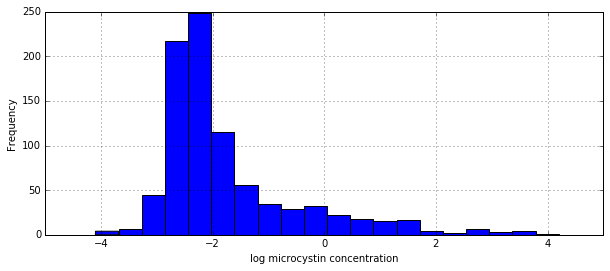

In [18]:
df_mic = df.loc[df['mic_ppb']!=0]
print(len(df_mic))
df_mic['mic_log'].hist(figsize=(10,4),color='blue',grid=True,bins=20)
plt.xlabel('log microcystin concentration')
plt.ylabel('Frequency')
# plt.savefig('figures_to_look_at/hist_logMIC.png',dpi=300)
plt.show()

1138


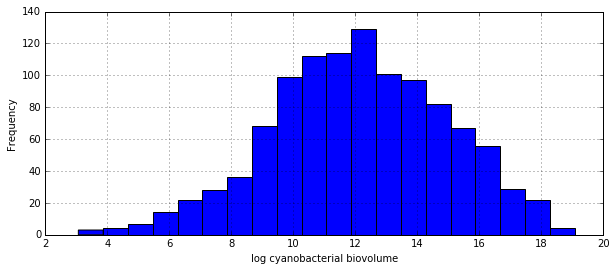

1138


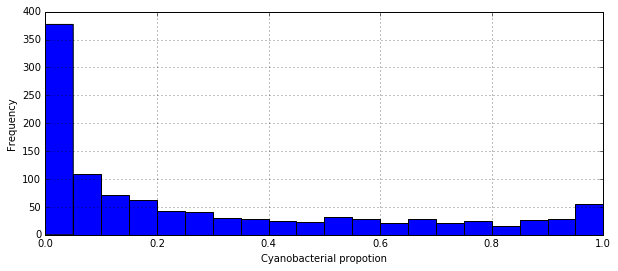

In [19]:
df_cbv = df.loc[df['cybv_um3ml']!=0]
print(len(df_cbv))
df_cbv['cybv_log'].hist(figsize=(10,4),color='blue',grid=True,bins=20)
plt.xlabel('log cyanobacterial biovolume')
plt.ylabel('Frequency')
# plt.savefig('figures_to_look_at/hist_logCyanoBV.png',dpi=300)
plt.show()

df_cpor = df.copy()
print(len(df_cpor))
df_cpor['cypro'].hist(figsize=(10,4),color='blue',grid=True,bins=20)
plt.xlabel('Cyanobacterial propotion')
plt.ylabel('Frequency')
# plt.savefig('figures_to_look_at/hist_CyanoPro.png',dpi=300)
plt.show()

1137


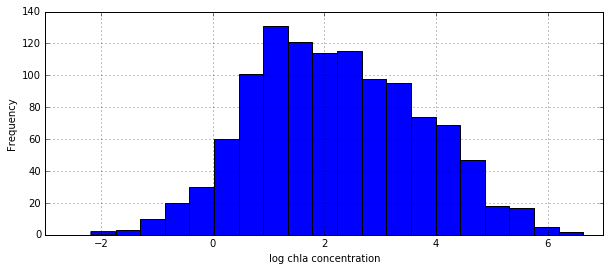

In [20]:
df_chla = df.loc[df['chla_ugl']!=0]
print(len(df_chla))
df_chla['chla_log'].hist(figsize=(10,4),color='blue',grid=True,bins=20)
plt.xlabel('log chla concentration')
plt.ylabel('Frequency')
# plt.savefig('figures_to_look_at/hist_logCHLA.png',dpi=300)
plt.show()

In [22]:
df_chla = df_chla.loc[df_chla['P_crop_kgha']!=0]
print(len(df_chla))
df_chla = df_chla.loc[df_chla['P_manu_kgha']!=0]
print(len(df_chla))
df_chla = df_chla.loc[df_chla['P_fert_kgha']!=0]
print(len(df_chla))
df_chla = df_chla.loc[df_chla['temp_surf']<40] #erroneous values
print(len(df_chla))
df_chla = df_chla.loc[df_chla['temp_bot']<40] #erroneous values
print(len(df_chla))
df_chla = df_chla.loc[df_chla['strat_buoy_freq_s2']>-4] #erroneous values
print(len(df_chla))
df_chla = df_chla.loc[df_chla['strat_buoy_freq_s2']<0.05] #outliers
print(len(df_chla))
df_chla[['P_net_kgha','P_crop_kgha','P_fert_kgha','P_manu_kgha',
         'temp_surf','temp_bot',
         'strat_thermod_m','strat_buoy_freq_s2',
         'prec_tot_ann_mm','tn_ugl','tp_ugl']].describe()

695
695
695
695
695
695
695


,P_net_kgha,P_crop_kgha,P_fert_kgha,P_manu_kgha,temp_surf,temp_bot,strat_thermod_m,strat_buoy_freq_s2,prec_tot_ann_mm,tn_ugl,tp_ugl
count,693.000000,693.000000,693.000000,693.000000,695.000000,695.000000,695.000000,695.000000,689.000000,695.000000,695.000000
mean,2.083331,34.944328,27.147891,9.879768,24.997595,20.102899,3.115238,0.005100,805.250576,1354.932230,143.777122
std,25.329468,40.960615,37.595480,22.381730,4.149346,6.715047,3.350651,0.005165,361.951029,2505.113293,306.082537
min,-86.358332,0.001069,0.000325,0.000078,11.390000,3.470000,0.125000,-0.000289,66.078065,41.000000,4.000000
25%,-6.936909,3.448063,1.827135,0.300402,22.207500,15.510000,0.550000,0.000930,495.928308,459.500000,25.800000
50%,-0.203769,17.213652,9.925566,1.854072,25.280000,21.100000,2.250000,0.003625,769.866318,803.000000,53.000000
75%,3.811191,53.486595,39.029740,8.766609,28.115000,25.250000,4.550126,0.008144,1074.787608,1567.000000,129.500000
max,153.011294,194.371360,200.325729,163.706334,35.500000,35.500000,34.250000,0.044149,1989.333231,54000.000000,3590.000000


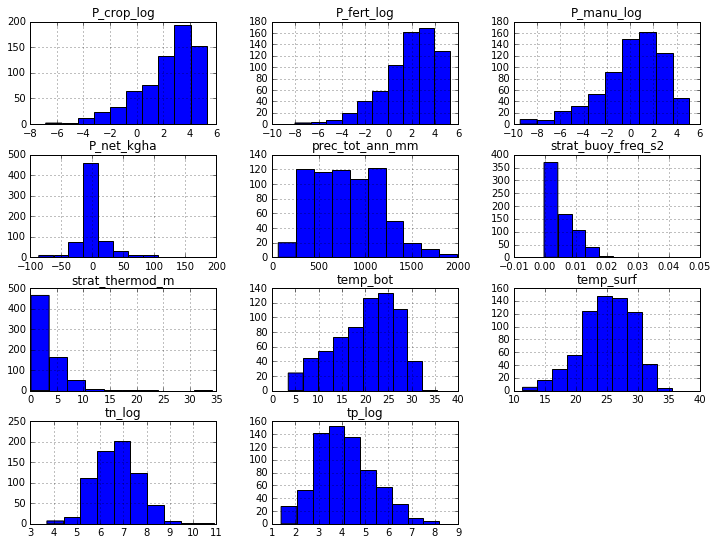

In [23]:
df_plot = df_chla[['tn_log','tp_log','prec_tot_ann_mm',
                   'P_crop_log','P_fert_log','P_manu_log','P_net_kgha',
                   'temp_surf','temp_bot','strat_thermod_m','strat_buoy_freq_s2',]]
# display(df_plot)
df_plot.hist(figsize=(12,9),layout=(4,3))
# plt.savefig('figures_to_look_at/hist_predictorvars.png',dpi=300)
plt.show()

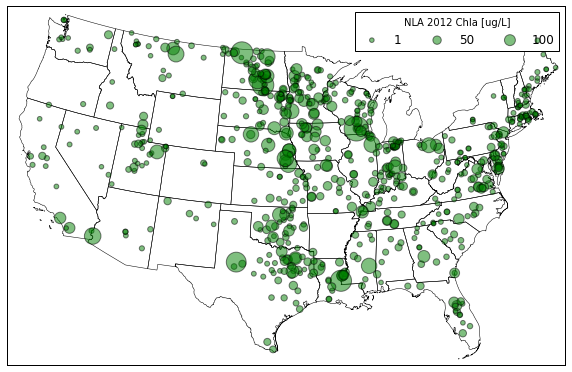

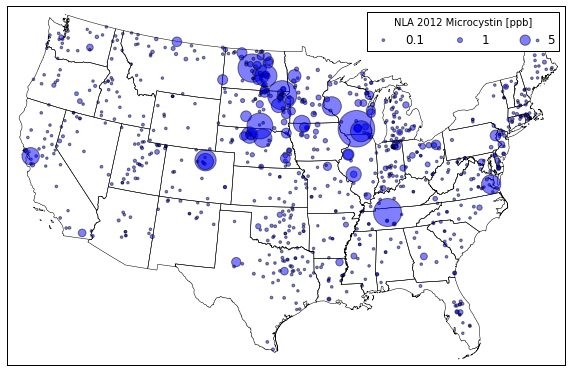

In [24]:
# Plot NLA Lat/longs
fig = plt.figure(figsize=(10,7))

# Create basemap
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('../USstatesSHP/st99_d00', name='states', drawbounds=True) # Load US states shapefile

# Add NLA data
x,y = map(df_chla['lon_dd'].values, df_chla['lat_dd'].values)
map.scatter(x, y, s=20+df_chla['chla_ugl'],c='green',alpha=0.5,
            label='NLA 2012 Microcystin',zorder=10)
# plt.legend(bbox_to_anchor=(0.2,0.1), loc='center')
#generate legend
leg_sizes = [1,50,100]

l1 = plt.scatter([],[], s=20+leg_sizes[0],c='green',alpha=0.5)
l2 = plt.scatter([],[], s=20+leg_sizes[1],c='green',alpha=0.5)
l3 = plt.scatter([],[], s=20+leg_sizes[2],c='green',alpha=0.5)

leg = plt.legend([l1, l2, l3], leg_sizes, ncol=3, frameon=True, fontsize=12,
                 title='NLA 2012 Chla [ug/L]')
# plt.savefig('figures_to_look_at/map_chla.png',dpi=300)
plt.show()

# repeat for microcystins
fig = plt.figure(figsize=(10,7))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.readshapefile('../USstatesSHP/st99_d00', name='states', drawbounds=True) # Load US states shapefile
x,y = map(df_mic['lon_dd'].values, df_mic['lat_dd'].values)

color_str = 'blue'
map.scatter(x, y, s=5+20*df_mic['mic_ppb'],c=color_str,alpha=0.5,
            label='NLA 2012 Microcystin',zorder=10)
#generate legend
leg_sizes = [0.1,1,5]
l1 = plt.scatter([],[], s=5+20*leg_sizes[0],c=color_str,alpha=0.5)
l2 = plt.scatter([],[], s=5+20*leg_sizes[1],c=color_str,alpha=0.5)
l3 = plt.scatter([],[], s=5+20*leg_sizes[2],c=color_str,alpha=0.5)
leg = plt.legend([l1, l2, l3], leg_sizes, ncol=3, frameon=True, fontsize=12,
                 title='NLA 2012 Microcystin [ppb]')
# plt.savefig('figures_to_look_at/map_mic.png',dpi=300)
plt.show()

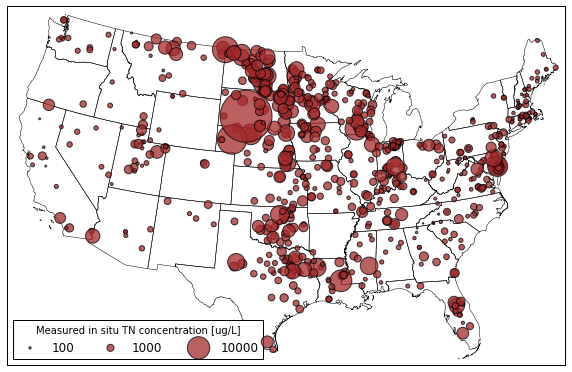

In [29]:
# Plot spatial variation of predictors
preds = ['P_crop_kgha','P_fert_kgha','P_manu_kgha','P_net_kgha',
         'prec_tot_ann_mm','tn_ugl','tp_ugl',
         'temp_surf','temp_bot','strat_thermod_m','strat_buoy_freq_s2']
colors = ['orange','orange','orange','orange','blue','brown','brown',
          'red','red','pink','pink']
scales = [1,1,1,1,14,20,1.5,
          0.1,0.1,0.05,0.00005]
pred_leg_sizes = [[5,20,75],[1,10,50],[1,5,35],[1,10,50],[500,750,1000],[100,1000,10000],[5,50,500],
                  [15,25,35],[15,25,35],[0.5,5,30],[0.001,0.003,0.010]]
pred_name_dict = {
    'P_crop_kgha':'Average watershed P output, crops [kgP/ha/year]',
    'P_fert_kgha':'Average watershed P input, fertilizer [kgP/ha/year]',
    'P_manu_kgha':'Average watershed P input, manure [kgP/ha/year]',
    'P_net_kgha': 'Average watershed net P flux [kgP/ha/year]',
    'prec_tot_ann_mm': 'Average watershed annual precipitation [mm]',
    'tn_ugl': 'Measured in situ TN concentration [ug/L]',
    'tp_ugl': 'Measured in situ TP concentration [ug/L]',
    'temp_surf': 'Surface water temperature [degC]',
    'temp_bot': 'Bottom water temperature [degC]',
    'strat_thermod_m':'Depth of the thermocline [m]',
    'strat_buoy_freq_s2':'Buoyancy frequency [s^-2]'
}
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
x,y = map(df_chla['lon_dd'].values, df_chla['lat_dd'].values)
for i in range(5,6):#range(0,len(preds)):
    pred=preds[i]
    col = colors[i]
    scal = scales[i]
    fig = plt.figure(figsize=(10,7))
    # Create basemap
    map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    map.readshapefile('../USstatesSHP/st99_d00', name='states', drawbounds=True) # Load US states shapefile

    # Add lat/long data
    map.scatter(x, y, s=df_chla[pred]/scal,c=col,alpha=0.75,zorder=10)
    if pred=='P_net_kgha':
        col2 = 'green'
        map.scatter(x, y, s=-df_chla[pred]/scal,c=col2,alpha=0.75,zorder=10)
    
    #generate legend
    if i<11:
        leg_sizes = pred_leg_sizes[i]
    else:
        leg_sizes = df_chla[pred].describe()[['25%','50%','75%']]#.round().map(int)
    l1 = plt.scatter([],[], s=leg_sizes[0]/scal,c=col,alpha=0.75)
    l2 = plt.scatter([],[], s=leg_sizes[1]/scal,c=col,alpha=0.75)
    l3 = plt.scatter([],[], s=leg_sizes[2]/scal,c=col,alpha=0.75)
    if pred=='P_net_kgha':
        l4 = plt.scatter([],[], s=leg_sizes[0]/scal,c=col2,alpha=0.75)
        l5 = plt.scatter([],[], s=leg_sizes[1]/scal,c=col2,alpha=0.75)
        l6 = plt.scatter([],[], s=leg_sizes[2]/scal,c=col2,alpha=0.75)
        leg = plt.legend([l1, l4, l2, l5, l3, l6], 
                         [leg_sizes[0],-leg_sizes[0],leg_sizes[1],-leg_sizes[1],leg_sizes[2],-leg_sizes[2]], ncol=3, frameon=True, fontsize=12,
                         title=pred_name_dict[pred],loc=3)
    else:
        leg = plt.legend([l1, l2, l3], leg_sizes, ncol=3, frameon=True, fontsize=12,
                         title=pred_name_dict[pred],loc=3)
#     plt.savefig('figures_to_look_at/map_{}.png'.format(pred),dpi=300)
    plt.show()

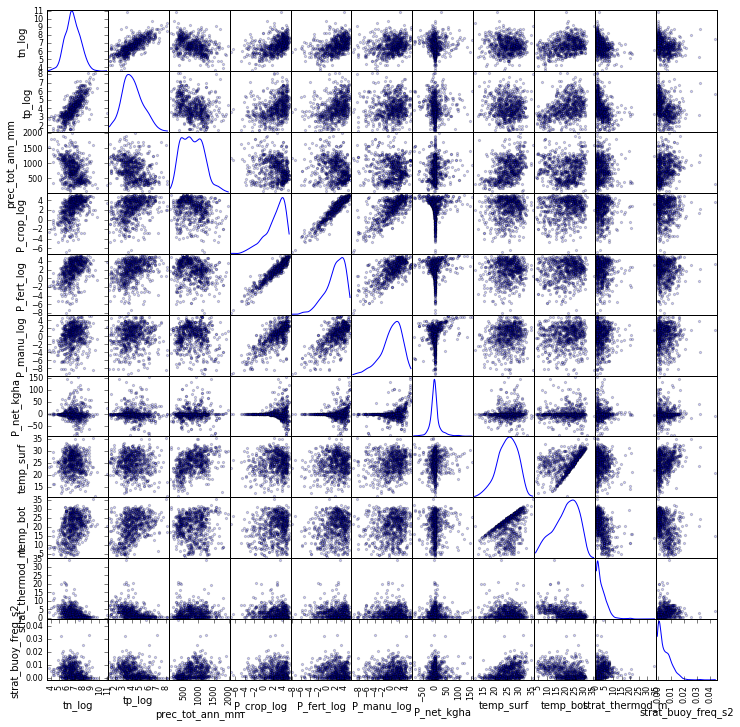

In [30]:
pd.tools.plotting.scatter_matrix(df_plot
                                 , alpha=0.2, figsize=(12,12), diagonal='kde')
# plt.savefig('figures_to_look_at/predvars_scatter.png',dpi=300)
plt.show()